<a href="https://colab.research.google.com/github/nsk20/CMPE257-Fall23-ShyamKumar-Nalluri/blob/homework-1/Task_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Task 2

A.

Saving 2_1.jpg to 2_1.jpg


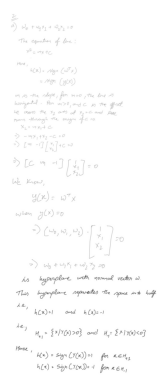

In [2]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open('2_1.jpg')  # Replace 'your_image.jpg' with the actual file name

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()

B.

Saving 4.jpg to 4.jpg


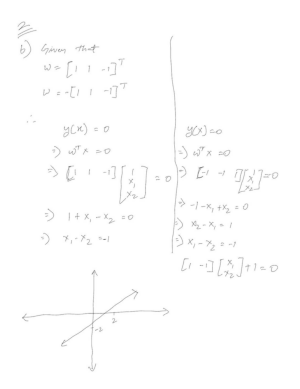

In [3]:
from google.colab import files
uploaded = files.upload()
from PIL import Image
import matplotlib.pyplot as plt

# Load the image
image = Image.open('4.jpg')  # Replace 'your_image.jpg' with the actual file name

# Display the image
plt.imshow(image)
plt.axis('off')  # Turn off axis labels
plt.show()